# Imports

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Load the training dataset

In [6]:
train_path = '../data/train/train.csv'
train_data = pd.read_csv(train_path)

# Load the test dataset

In [7]:
test_path = '../data/test/test.csv'
test_data = pd.read_csv(test_path)
real_test_data = pd.read_csv(test_path)
test_data.Age.fillna(test_data.Age.median(), inplace=True)
test_data.Fare.fillna(test_data.Fare.median(), inplace=True)

selected_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
# Merge survived column for accuracy test aginst test data
test_data = test_data[selected_columns]
X_test = pd.get_dummies(test_data, columns=['Sex'])

In [8]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,0,1
1,3,47.0,1,0,7.0000,1,0
2,2,62.0,0,0,9.6875,0,1
3,3,27.0,0,0,8.6625,0,1
4,3,22.0,1,1,12.2875,1,0
...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,0,1
414,1,39.0,0,0,108.9000,1,0
415,3,38.5,0,0,7.2500,0,1
416,3,27.0,0,0,8.0500,0,1


# Select only relevant colums of data

In [9]:
selected_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']
data_selected = train_data[selected_columns]

### Age data is missing some data

In [10]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


### Fill missing data with median

In [11]:
data_selected.Age.fillna(data_selected.Age.median(), inplace=True)

/tmp/ipykernel_190710/1801840652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected.Age.fillna(data_selected.Age.median(), inplace=True)


In [12]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


## Separate the features and target variable

In [13]:
X = data_selected.drop('Survived', axis=1)  # Features
y = data_selected['Survived']  # Target variable

In [14]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


### We can see that Sex is categorized with strings we will need to encode it as numbers

In [15]:
# Convert Sex variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['Sex'])

In [16]:
X_encoded

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1
887,1,19.0,0,0,30.0000,1,0
888,3,28.0,1,2,23.4500,1,0
889,1,26.0,0,0,30.0000,0,1


## Split the data into training and validation sets

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# SVM


Evaluation Metrics for svm:
Accuracy: 0.80
Precision: 0.80
Recall: 0.69
F1-score: 0.74


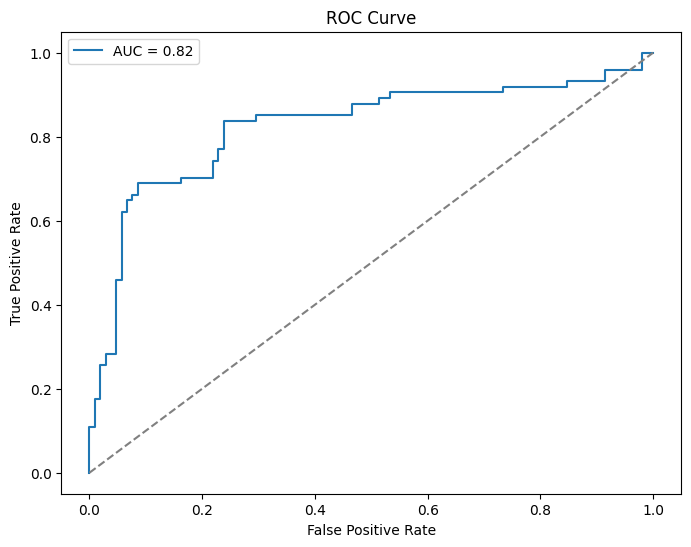

AUC: 0.82


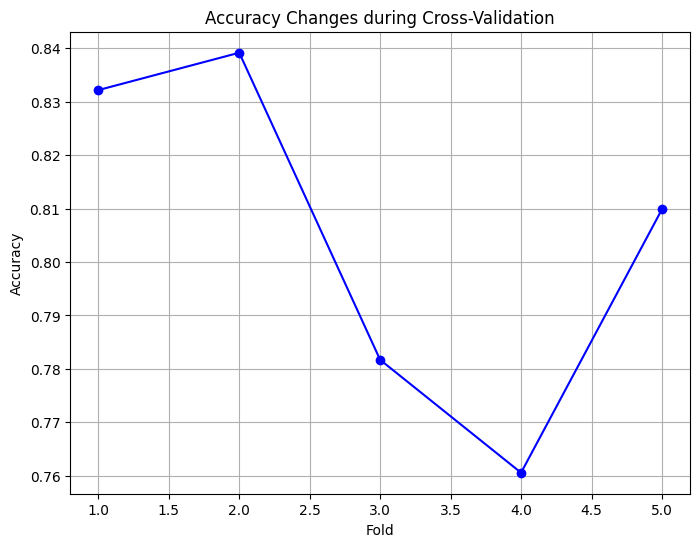

In [33]:
# Initialize the svm classifier
svm_classifier = SVC(kernel='rbf', C=100, probability=True, random_state=42)

# Train the svm model
svm_classifier.fit(X_train, y_train)

# Make predictions on the validation set
svm_predictions = svm_classifier.predict(X_val)

# Evaluate the accuracy of the svm model on the validation set
svm_accuracy = accuracy_score(y_val, svm_predictions)
svm_precision = precision_score(y_val, svm_predictions)
svm_recall = recall_score(y_val, svm_predictions)
svm_f1 = f1_score(y_val, svm_predictions)

# Display evaluation metrics for svm
print("\nEvaluation Metrics for svm:")
print(f"Accuracy: {svm_accuracy:.2f}")
print(f"Precision: {svm_precision:.2f}")
print(f"Recall: {svm_recall:.2f}")
print(f"F1-score: {svm_f1:.2f}")

y_pred_proba = svm_classifier.predict_proba(X_val)[:, 1]  # Extract probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
auc = roc_auc_score(y_val, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f"AUC: {auc:.2f}")

# Perform cross-validation to visualize accuracy changes
accuracies = cross_val_score(svm_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Plotting accuracy changes
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy Changes during Cross-Validation')
plt.grid(True)
plt.show()


# KNN

In [19]:
# Define the grid of hyperparameters
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 11, 13, 17, 20, 23],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Create a grid search object
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_knn.fit(X_train, y_train)

# Get the best hyperparameters
best_params_knn = grid_search_knn.best_params_


best_params_knn:  {'algorithm': 'auto', 'n_neighbors': 13, 'p': 1, 'weights': 'distance'}

Evaluation Metrics for KNN:
Accuracy: 0.79
Precision: 0.75
Recall: 0.76
F1-score: 0.75


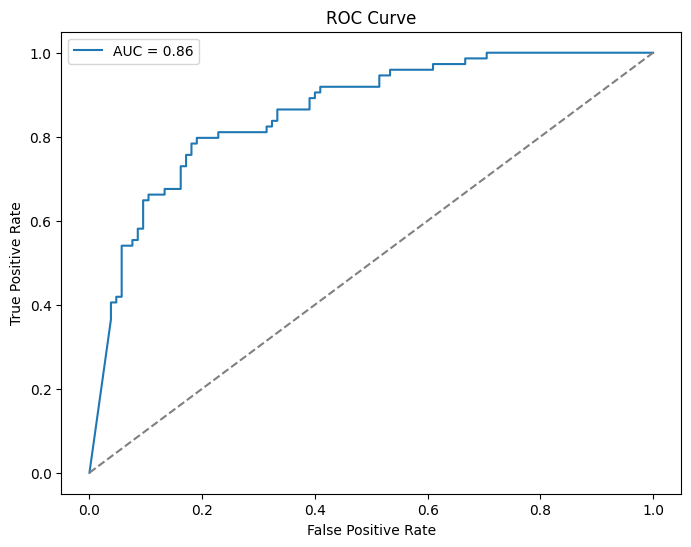

AUC: 0.86


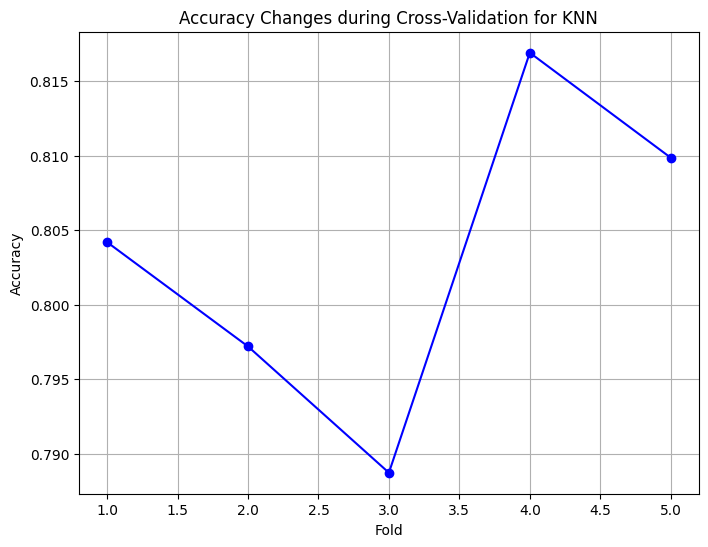

In [34]:
# Initialize the KNN classifier
print("best_params_knn: ", best_params_knn)
# knn_classifier = KNeighborsClassifier(n_neighbors=20, algorithm='brute')  # You can specify the number of neighbors (K) here
knn_classifier = KNeighborsClassifier(**best_params_knn)  # You can specify the number of neighbors (K) here

# Train the KNN model
knn_classifier.fit(X_train, y_train)

# Make predictions on the validation set
knn_predictions = knn_classifier.predict(X_val)

# Evaluate the accuracy of the KNN model on the validation set
knn_accuracy = accuracy_score(y_val, knn_predictions)
knn_precision = precision_score(y_val, knn_predictions)
knn_recall = recall_score(y_val, knn_predictions)
knn_f1 = f1_score(y_val, knn_predictions)

# Display evaluation metrics for KNN
print("\nEvaluation Metrics for KNN:")
print(f"Accuracy: {knn_accuracy:.2f}")
print(f"Precision: {knn_precision:.2f}")
print(f"Recall: {knn_recall:.2f}")
print(f"F1-score: {knn_f1:.2f}")

y_pred_proba = knn_classifier.predict_proba(X_val)[:, 1]  # Extract probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
auc = roc_auc_score(y_val, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f"AUC: {auc:.2f}")

# Perform cross-validation to visualize accuracy changes
accuracies = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Plotting accuracy changes
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy Changes during Cross-Validation for KNN')
plt.grid(True)
plt.show()

# Bayes Classifier


Evaluation Metrics for nb:
Accuracy: 0.79
Precision: 0.76
Recall: 0.72
F1-score: 0.74


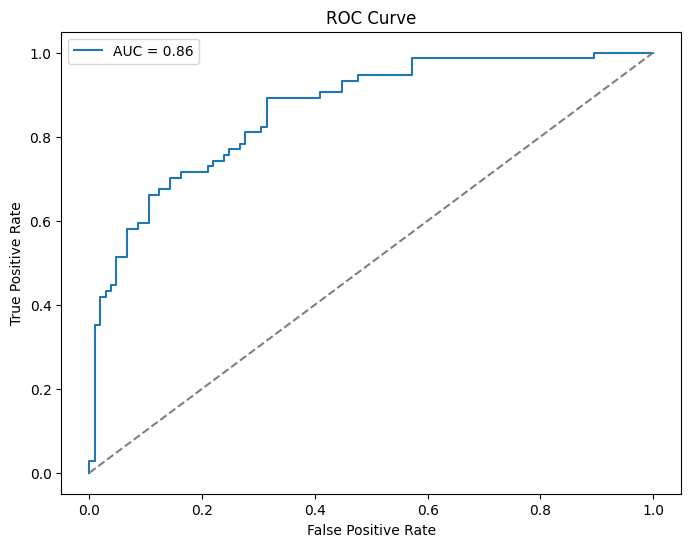

AUC: 0.86


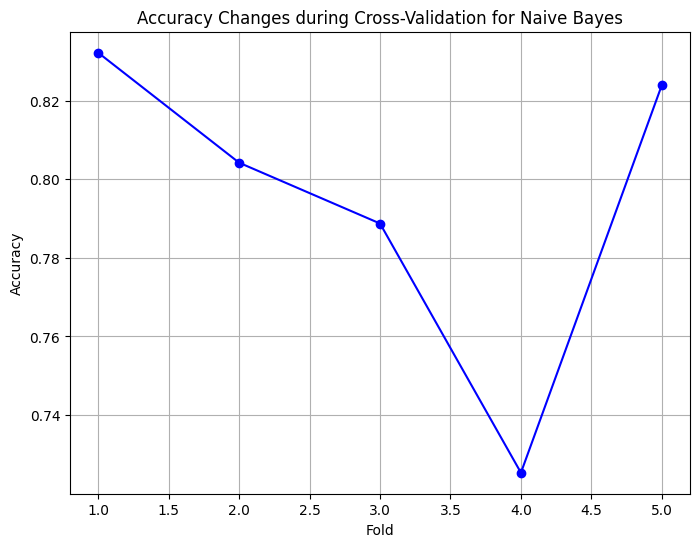

In [35]:
# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the Naive Bayes model
nb_classifier.fit(X_train, y_train)

# Make predictions on the validation set
nb_predictions = nb_classifier.predict(X_val)

nb_accuracy = accuracy_score(y_val, nb_predictions)
nb_precision = precision_score(y_val, nb_predictions)
nb_recall = recall_score(y_val, nb_predictions)
nb_f1 = f1_score(y_val, nb_predictions)

# Display evaluation metrics for nb
print("\nEvaluation Metrics for nb:")
print(f"Accuracy: {nb_accuracy:.2f}")
print(f"Precision: {nb_precision:.2f}")
print(f"Recall: {nb_recall:.2f}")
print(f"F1-score: {nb_f1:.2f}")

y_pred_proba = nb_classifier.predict_proba(X_val)[:, 1]  # Extract probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
auc = roc_auc_score(y_val, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f"AUC: {auc:.2f}")

# Perform cross-validation to visualize accuracy changes
accuracies = cross_val_score(nb_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Plotting accuracy changes
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy Changes during Cross-Validation for Naive Bayes')
plt.grid(True)
plt.show()

# Decision Tree

In [22]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15, 20],
}

# Create a grid search object
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

best_params:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}

Evaluation Metrics for Decision Tree:
Accuracy: 0.77
Precision: 0.84
Recall: 0.55
F1-score: 0.67


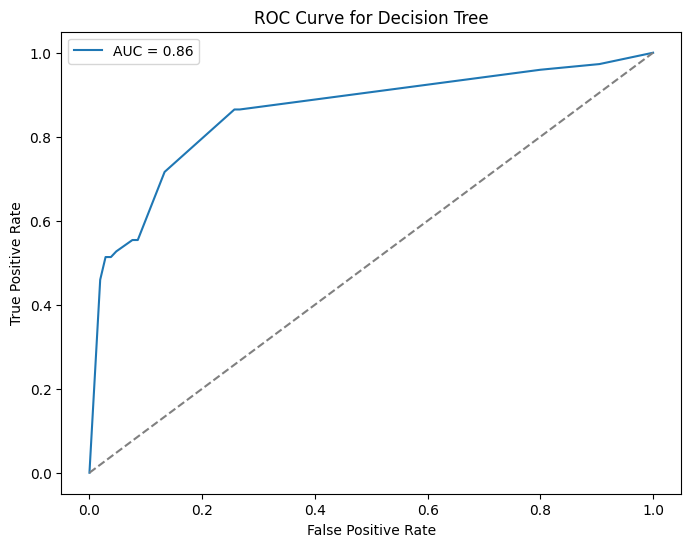

AUC for Decision Tree: 0.86


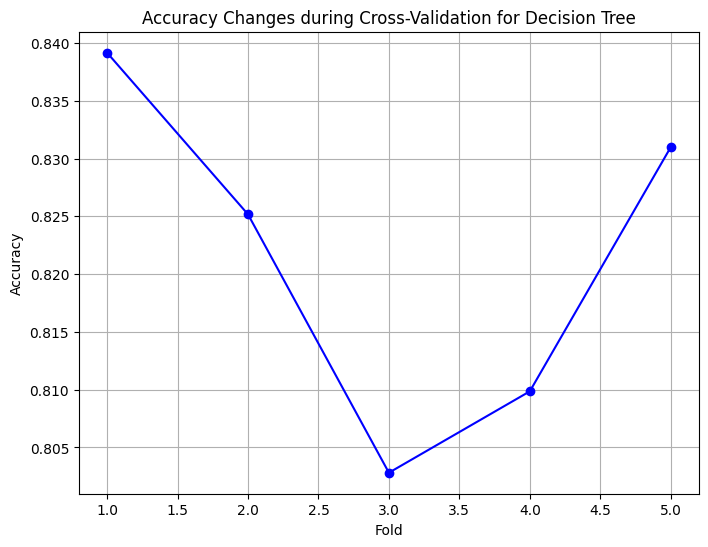

In [48]:
# Initialize the decision tree classifier
print("best_params: ", best_params)
tree_classifier = DecisionTreeClassifier(**best_params, random_state=42)

# Train the decision tree model
tree_classifier.fit(X_train, y_train)

# Make predictions on the validation set
tree_predictions = tree_classifier.predict(X_val)

# Evaluate the accuracy of the decision tree model on the validation set
tree_accuracy = accuracy_score(y_val, tree_predictions)
tree_precision = precision_score(y_val, tree_predictions)
tree_recall = recall_score(y_val, tree_predictions)
tree_f1 = f1_score(y_val, tree_predictions)

# Display evaluation metrics for the decision tree
print("\nEvaluation Metrics for Decision Tree:")
print(f"Accuracy: {tree_accuracy:.2f}")
print(f"Precision: {tree_precision:.2f}")
print(f"Recall: {tree_recall:.2f}")
print(f"F1-score: {tree_f1:.2f}")

# Calculate ROC curve and AUC for the decision tree
y_pred_proba_tree = tree_classifier.predict_proba(X_val)[:, 1]  # Extract probabilities for the positive class
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_val, y_pred_proba_tree)
auc_tree = roc_auc_score(y_val, y_pred_proba_tree)

# Plot ROC curve for the decision tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, label=f'AUC = {auc_tree:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()
plt.show()

print(f"AUC for Decision Tree: {auc_tree:.2f}")

# Perform cross-validation to visualize accuracy changes
accuracies = cross_val_score(tree_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Plotting accuracy changes
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy Changes during Cross-Validation for Decision Tree')
plt.grid(True)
plt.show()

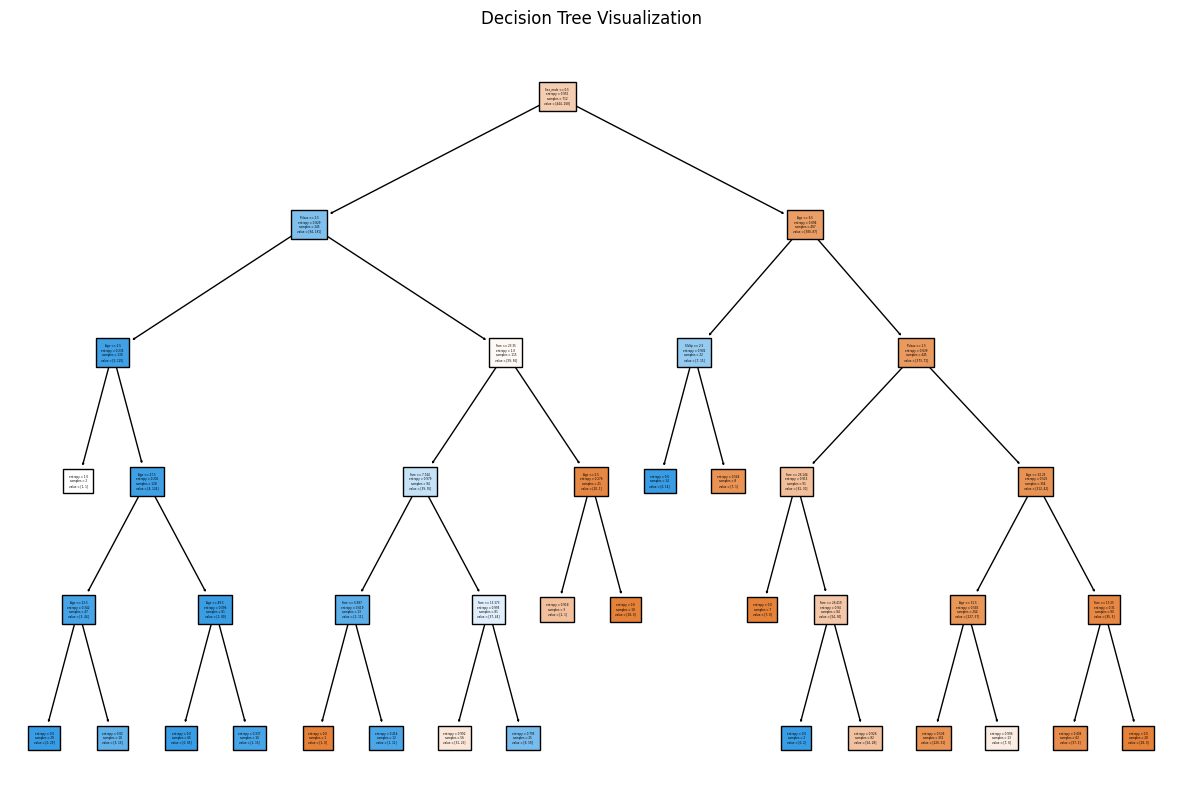

In [24]:
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_classifier, filled=True, feature_names=list(X_train), fontsize=7)
plt.title('Decision Tree Visualization')
plt.show()

# Multi-Layer Perceptron

6/6 [==============================] - 0s 3ms/step

Evaluation Metrics for Neural Network:
Accuracy: 0.83
Precision: 0.85
Recall: 0.72
F1-score: 0.78


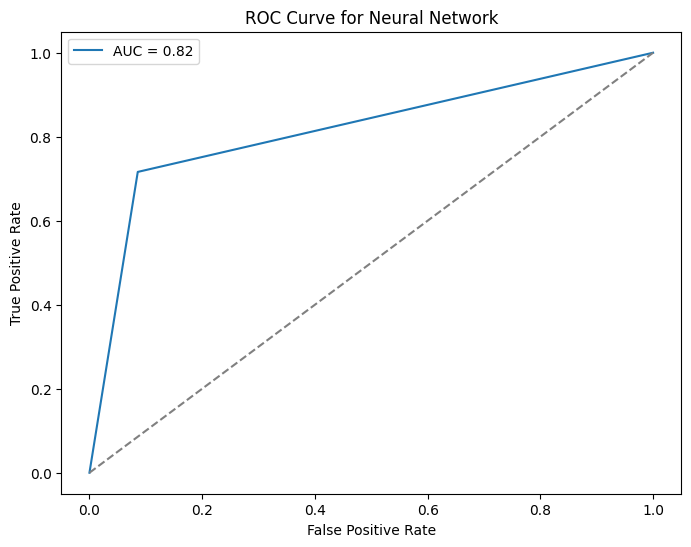

AUC for Neural Network: 0.82


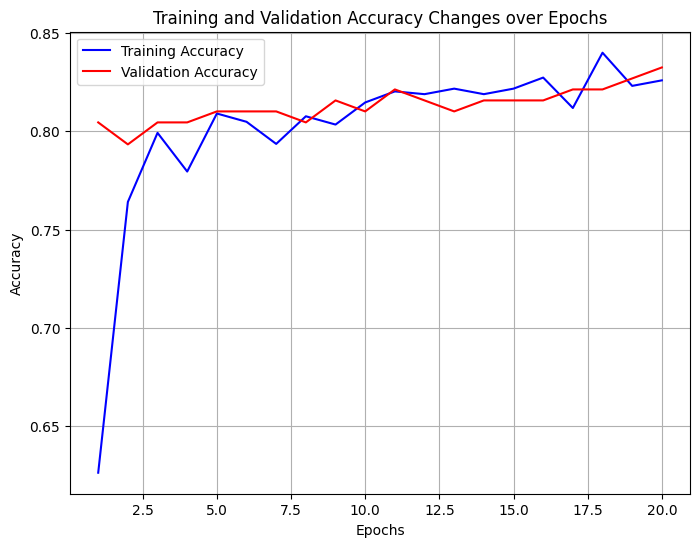

In [44]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# NN archeticture
model = Sequential([
    Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Regularization to prevent overfitting
    Dense(units=64, activation='relu'),
    Dropout(0.3),
    Dense(units=32, activation='relu'),
    Dropout(0.3),
    Dense(units=1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=0)

# Make predictions on the validation set
nn_predictions = model.predict(X_val)
nn_predictions = (nn_predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics for the neural network
nn_accuracy = accuracy_score(y_val, nn_predictions)
nn_precision = precision_score(y_val, nn_predictions)
nn_recall = recall_score(y_val, nn_predictions)
nn_f1 = f1_score(y_val, nn_predictions)

print("\nEvaluation Metrics for Neural Network:")
print(f"Accuracy: {nn_accuracy:.2f}")
print(f"Precision: {nn_precision:.2f}")
print(f"Recall: {nn_recall:.2f}")
print(f"F1-score: {nn_f1:.2f}")

# Calculate ROC curve and AUC for the neural network
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_val, nn_predictions)
auc_nn = roc_auc_score(y_val, nn_predictions)

# Plot ROC curve for the neural network
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, label=f'AUC = {auc_nn:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Neural Network')
plt.legend()
plt.show()

print(f"AUC for Neural Network: {auc_nn:.2f}")

# Extract training and validation accuracy from the history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plotting accuracy changes during training
epochs = range(1, len(training_accuracy) + 1)
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Changes over Epochs')
plt.legend()
plt.grid(True)
plt.show()